In [1]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
import re
import seaborn as sns

In [2]:
data=pd.read_csv(r'D:\ML DATA\MAchine learning data\smsspamcollection\SMSSpamCollection', delimiter= '\t',
                names=['labels','messages'])
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.shape

(5572, 2)

In [4]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.columns

Index(['labels', 'messages'], dtype='object')

In [6]:
stemmer=PorterStemmer()
lemmitizer=WordNetLemmatizer()

In [7]:
corpus=[]
for i in range(len(data)):
    msg=re.sub('[^a-zA-Z]',' ', data['messages'][i])
    msg=msg.lower()
    msg=msg.split()
    [lemmitizer.lemmatize(word) for word in msg if word not in set(stopwords.words('english'))]
    msg=' '.join(msg)
    corpus.append(msg)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
Tf=TfidfVectorizer()

In [10]:
X=Tf.fit_transform(corpus).toarray()
y=pd.get_dummies(data['labels'])
y=y.iloc[:,1]
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: spam, Length: 5572, dtype: uint8

In [12]:
Tf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 7759)
(1115, 7759)
(4457,)
(1115,)


In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [16]:
NB=BernoulliNB(alpha=0.2)
NB.fit(X_train,y_train)
NB_pred_test=NB.predict(X_test)
NB_pred_train=NB.predict(X_train)

In [17]:
print('The Accuracy Score for the Training set using Naive Bayes is',accuracy_score(y_train,NB_pred_train))
print('The Accuracy Score for the Testing set using Naive Bayes is',accuracy_score(y_test,NB_pred_test))
print('***********************************************************************************')
print('The Precision Score for the Training set using Naive Bayes is',precision_score(y_train,NB_pred_train))
print('The Precision Score for the Testing set using Naive Bayes is',precision_score(y_test,NB_pred_test))
print('***********************************************************************************')
print('The Recall Score for the Training set using Naive Bayes is',recall_score(y_train,NB_pred_train))
print('The Recall Score for the Testing set using Naive Bayes is',recall_score(y_test,NB_pred_test))
print('***********************************************************************************')
print('The F1 Score for the Training set using Naive Bayes is',f1_score(y_train,NB_pred_train))
print('The F1 Score for the Testing set using Naive Bayes is',f1_score(y_test,NB_pred_test))

The Accuracy Score for the Training set using Naive Bayes is 0.9948395781916087
The Accuracy Score for the Testing set using Naive Bayes is 0.9856502242152466
***********************************************************************************
The Precision Score for the Training set using Naive Bayes is 0.993006993006993
The Precision Score for the Testing set using Naive Bayes is 0.9556962025316456
***********************************************************************************
The Recall Score for the Training set using Naive Bayes is 0.9676320272572402
The Recall Score for the Testing set using Naive Bayes is 0.94375
***********************************************************************************
The F1 Score for the Training set using Naive Bayes is 0.9801553062985332
The F1 Score for the Testing set using Naive Bayes is 0.9496855345911951


In [18]:
cm=confusion_matrix(y_test,NB_pred_test)
cm

array([[948,   7],
       [  9, 151]], dtype=int64)

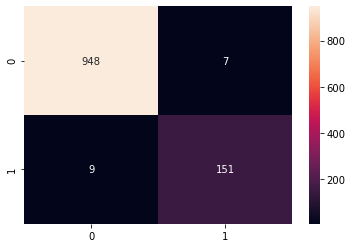

In [19]:
sns.heatmap(cm, annot=True,fmt='.4g')